In [ ]:
#fathima irfana np
# roll no :30
#aim= Write a program to implement SMS spam classification with NaiveBayes classifier using 'the dataset spam.csv'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importing the Data set
df = pd.read_csv('/content/spam.csv', encoding='latin1')
print(df)


##Dropping the unwanted columns Unnamed: 2, Unnamed: 3 and Unnamed:4
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head()

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking the maximum length of sms
print(len(df))

5572


In [ ]:
##Number of observations in each label spam and ham
df.label.value_counts()


,count
label,
ham,4825
spam,747


In [ ]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['length'] = df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
## Splitting the dataset into the Training set and Test set
x=df['sms']
y=df['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train)

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object


In [ ]:
## Instantiate the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

#fit the training data and then return the matrix
train_data = count_vector.fit_transform(x_train)
# Transform testing data and return the matrix.
test_data = count_vector.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_data, y_train)

MultinomialNB()

In [ ]:
print(test_data)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17357 stored elements and shape (1393, 7354)>
  Coords	Values
  (0, 816)	1
  (0, 1817)	1
  (0, 3668)	1
  (0, 3805)	1
  (0, 4949)	1
  (0, 5789)	1
  (0, 6561)	1
  (0, 6594)	1
  (0, 6802)	1
  (1, 2629)	1
  (1, 4680)	1
  (1, 6446)	1
  (1, 6995)	1
  (2, 864)	1
  (2, 896)	1
  (2, 952)	1
  (2, 977)	1
  (2, 1890)	1
  (2, 1929)	1
  (2, 2265)	2
  (2, 2572)	1
  (2, 2669)	1
  (2, 2782)	1
  (2, 3119)	1
  (2, 3232)	1
  :	:
  (1391, 6933)	1
  (1391, 7101)	2
  (1392, 279)	1
  (1392, 647)	1
  (1392, 977)	1
  (1392, 1017)	1
  (1392, 1335)	1
  (1392, 1731)	1
  (1392, 2137)	1
  (1392, 2306)	1
  (1392, 2950)	1
  (1392, 3558)	1
  (1392, 4358)	1
  (1392, 4528)	1
  (1392, 4646)	1
  (1392, 5311)	1
  (1392, 5671)	1
  (1392, 5831)	1
  (1392, 6208)	1
  (1392, 6446)	1
  (1392, 6561)	4
  (1392, 6719)	1
  (1392, 7192)	1
  (1392, 7305)	1
  (1392, 7310)	1


In [ ]:
# Predicting the test set results
y_pred = classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1193    3]
 [  16  181]]


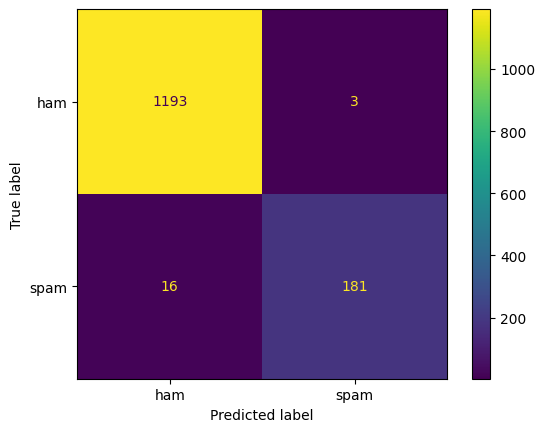

In [ ]:
##Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classifier.classes_)
disp.plot()

In [ ]:
##Classifier Accuracy
training_score = classifier.score(train_data, y_train)
test_score = classifier.score(test_data, y_test)
print(training_score)
print(test_score)

0.9928212491026561
0.9863603732950467


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred, pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, y_pred, pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, y_pred, pos_label="spam")))

Accuracy score: 0.9863603732950467
Precision score: 0.9836956521739131
Recall score: 0.9187817258883249
F1 score: 0.9501312335958005


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

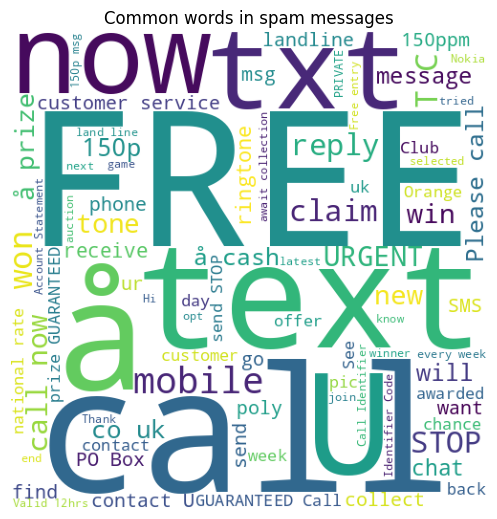

In [ ]:
# Get the spam messages
spam = df[df['label']=='spam']['sms'].str.cat(sep=',')
# Get the ham messages
ham = df[df['label']=='ham']['sms'].str.cat(sep=',')
# Initialize the word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
# Generate the word clouds for each type of message
spam_wc = wc.generate(spam)
# plot the word cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()



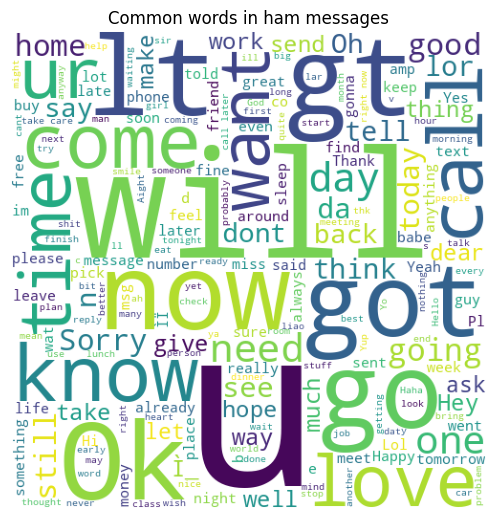

In [ ]:
# plot the word cloud for ham
ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()

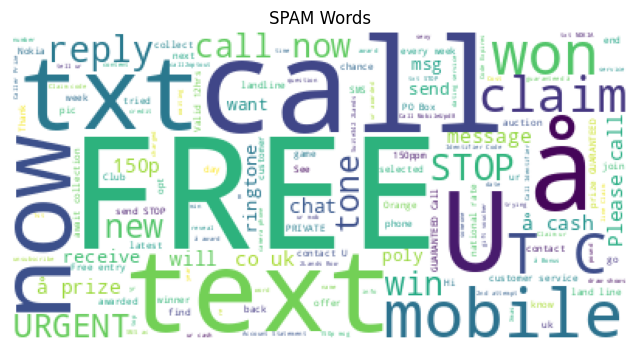

In [ ]:
# Simple Word Cloud - One at a time
spam_text = ' '.join(df[df['label']=='spam']['sms'])
spam_wc = WordCloud(background_color='white').generate(spam_text)

plt.figure(figsize=(8, 6))
plt.imshow(spam_wc)
plt.title("SPAM Words")
plt.axis("off")
plt.show()

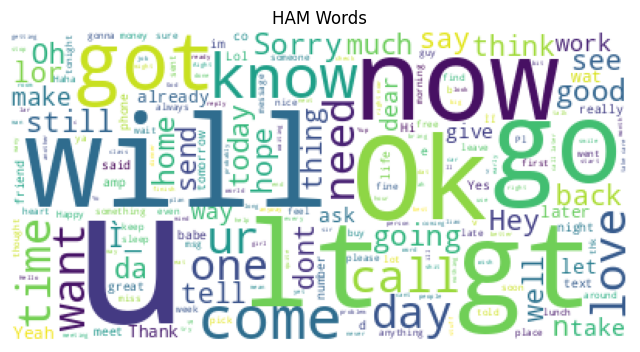

In [ ]:
# Simple Word Cloud - One at a time
ham_text = ' '.join(df[df['label']=='ham']['sms'])
ham_wc = WordCloud(background_color='white').generate(ham_text)

plt.figure(figsize=(8, 6))
plt.imshow(ham_wc)
plt.title("HAM Words")
plt.axis("off")
plt.show()